**Завдання 1.**

In [9]:
import os
import shutil
import sys

def parse_args():
    import argparse

    parser = argparse.ArgumentParser(description="Копіює файли у вихідній директорії та сортує їх в піддиректоріях за розширенням.")
    parser.add_argument('src_dir', type=str, help='Шлях до вихідної директорії')
    parser.add_argument('dst_dir', type=str, nargs='?', default='dist', help='Шлях до директорії призначення (за замовчуванням: dist)')
    return parser.parse_args()

def copy_files(src_dir, dst_dir):
    try:
        for item in os.listdir(src_dir):
            src_path = os.path.join(src_dir, item)
            if os.path.isdir(src_path):
                copy_files(src_path, dst_dir)
            elif os.path.isfile(src_path):
                extension = os.path.splitext(item)[1][1:]  # Отримуємо розширення файлу без крапки
                if extension:  # Перевіряємо, що у файлу є розширення
                    dst_path = os.path.join(dst_dir, extension)
                    os.makedirs(dst_path, exist_ok=True)  # Створюємо директорію, якщо вона не існує
                    shutil.copy2(src_path, os.path.join(dst_path, item))
    except Exception as e:
        print(f"Помилка обробки {src_dir}: {e}")

def main():
    args = parse_args()
    src_dir = args.src_dir
    dst_dir = args.dst_dir

    if not os.path.exists(src_dir):
        print(f"Вихідна директорія '{src_dir}' не існує.")
        sys.exit(1)

    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    copy_files(src_dir, dst_dir)
    print(f"Файли скопійовано та відсортовано у {dst_dir}")

if __name__ == "__main__":
    main()



usage: colab_kernel_launcher.py [-h] src_dir [dst_dir]
colab_kernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

**Завдання 2.**

Введіть рівень рекурсії для сніжинки Коха: 4


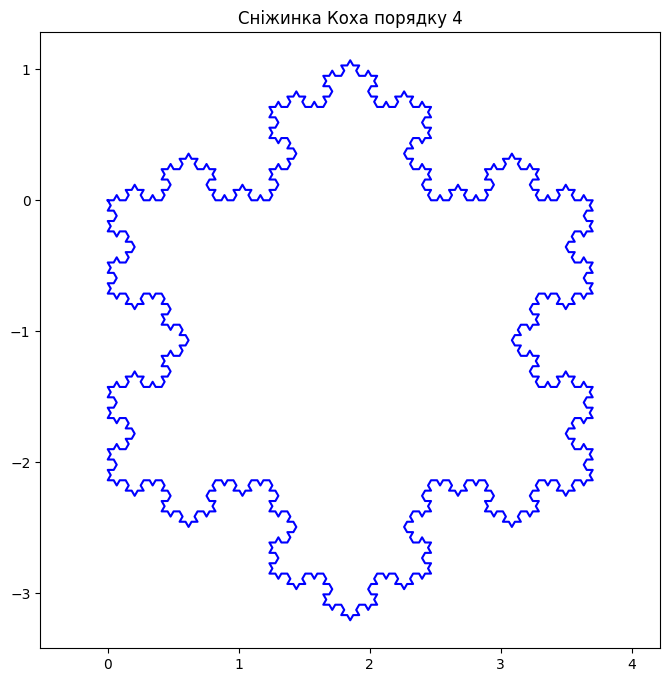

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def koch_snowflake(order, size):
    def koch_curve(order, size):
        if order == 0:
            return np.array([[0, 0], [size, 0]])
        points = koch_curve(order - 1, size / 3)
        new_points = []
        for i in range(len(points) - 1):
            p1 = points[i]
            p2 = points[i + 1]
            dx, dy = p2 - p1
            new_points.extend([
                p1,
                p1 + np.array([dx, dy]) / 3,
                p1 + np.array([dx, dy]) / 3 + np.array([dx - dy * np.sqrt(3), dy + dx * np.sqrt(3)]) / 6,
                p1 + np.array([dx, dy]) * 2 / 3,
            ])
        new_points.append(points[-1])
        return np.array(new_points)

    def rotate(points, angle):
        theta = np.radians(angle)
        rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
        return points.dot(rotation_matrix)

    def create_snowflake(order, size):
        triangle_points = koch_curve(order, size)
        snowflake_points = [triangle_points]
        for angle in [120, 240]:
            snowflake_points.append(rotate(triangle_points, angle) + snowflake_points[-1][-1])
        return np.vstack(snowflake_points)

    points = create_snowflake(order, size)
    return points

def plot_koch_snowflake(order, size):
    points = koch_snowflake(order, size)
    plt.figure(figsize=(8, 8))
    plt.plot(points[:, 0], points[:, 1], 'b-')
    plt.axis('equal')
    plt.title(f"Сніжинка Коха порядку {order}")
    plt.show()

# Введення рівня рекурсії
level = int(input("Введіть рівень рекурсії для сніжинки Коха: "))

# Малювання сніжинки Коха
plot_koch_snowflake(level, 300)



**Завдання 3.**

In [ ]:
def move_disk(n, source, target, auxiliary):
    if n == 1:
        print(f"Перемістити диск з {source} на {target}")
        towers[target].append(towers[source].pop())
        print_state()
    else:
        move_disk(n-1, source, auxiliary, target)
        move_disk(1, source, target, auxiliary)
        move_disk(n-1, auxiliary, target, source)

def print_state():
    print(f"Проміжний стан: {{'A': {towers['A']}, 'B': {towers['B']}, 'C': {towers['C']}}}")

def print_final_state():
    print(f"Кінцевий стан: {{'A': {towers['A']}, 'B': {towers['B']}, 'C': {towers['C']}}}")

# Вхідні дані
n = int(input("Введіть кількість дисків: "))

# Початковий стан стрижнів
towers = {'A': list(reversed(range(1, n+1))), 'B': [], 'C': []}
print("Початковий стан:")
print_state()

# Запуск алгоритму
move_disk(n, 'A', 'C', 'B')

# Виведення кінцевого стану
print_final_state()
